# Ejercicion de programación - Regresión Logistica

En este ejercicio se implementa regresion logistica y se aplica a dos diferentes datasets.

In [80]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## 1 Regresion Logistica

En esta parte del ejercicio, creará un modelo de regresión logística para predecir si un estudiante será admitido en una universidad. Suponga que es el administrador de un departamento universitario y desea determinar las posibilidades de admisión de cada solicitante en función de sus resultados en dos exámenes. Tiene datos históricos de solicitantes anteriores que puede usar como un conjunto de capacitación para la regresión logística. Para cada ejemplo de capacitación, se tiene las calificaciones del solicitante en dos exámenes y la decisión de admisión. Su tarea es crear un modelo de clasificación que calcule la probabilidad de admisión de un solicitante en función de los puntajes de esos dos exámenes.

La siguiente celda cargará los datos y las etiquetas correspondientes:

## Leemos los datos usando Pandas


In [81]:
# 7
# Aqui leemos los datos usando Pandas

# %%
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# 7
#Cargar datos
data = pd.read_csv('./sample_data/Bank_Register_update.csv', encoding='utf-8')
# data = pd.read_csv('./laptop_price.csv')

# Leer Datos
print(data)

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602     1115          619          0       0   42   
1             2    15647311     1177          608          2       0   41   
2             3    15619304     2040          502          0       0   42   
3             4    15701354      289          699          0       0   39   
4             5    15737888     1822          850          2       0   43   
...         ...         ...      ...          ...        ...     ...  ...   
9995       9996    15606229     1999          771          0       1   39   
9996       9997    15569892     1336          516          0       1   35   
9997       9998    15584532     1570          709          0       0   36   
9998       9999    15682355     2345          772          1       1   42   
9999      10000    15628319     2751          792          0       0   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     

In [84]:
# 7
#Leer el formato del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [85]:
# # OJO EN ESTE CASO NO ES NECESARIO YA QUE TODOS SON NUMEROS
# # AHORA TENEMOS QUE CONVERTIR TODO A ENTERO
# # data.info()

# # %%
# #Convertir la columna Prize en entero
# # Eliminar decimales de la columna 'Prize'
# # data['Prize'] = data['Prize'].str.replace('\t', '').str.replace('$', '').str.replace(',', '').str.split('.', expand=True)[0]

# # Convertir los datos de la columna 'Prize' a enteros
# # data['Prize'] = data['Prize'].astype(int)


# # %%
# #Seleccionar y identificar columnas
# columnas_categoricas = data.select_dtypes(include=['object']).columns
# columnas_fechas = data.select_dtypes(include=['datetime64']).columns

# # %%
# #procesar frases
# for columna in columnas_categoricas:
#     #Convertir las frases a numeros
#     le = LabelEncoder()
#     data[columna] = le.fit_transform(data[columna])

# # %%
# data.info()

In [86]:
# 7
# En este caso los convertimos a matrices para que funcione con
# el resto del codigo

# Usaremos 2 X's
X = np.array(data.iloc[:, [3,8]])

# Exited -> columna[13]
y = np.array(data.iloc[:, 13])

# m = numero de ejemplos de entrenamiento
m = y.size
print(m)

10000


In [87]:
print(X)
print(y)

[[   619.        0.  ]
 [   608.    83807.86]
 [   502.   159660.8 ]
 ...
 [   709.        0.  ]
 [   772.    75075.31]
 [   792.   130142.79]]
[1 0 1 ... 1 1 0]


## No olvides normalizar los datos xd


In [88]:
# def  featureNormalize(X):
#     X_norm = X.copy()
#     mu = np.zeros(X.shape[1])
#     sigma = np.zeros(X.shape[1])

#     mu = np.mean(X, axis = 0)
#     sigma = np.std(X, axis = 0)
#     X_norm = (X - mu) / sigma

#     return X_norm, mu, sigma

def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [89]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[   619.        0.  ]
 [   608.    83807.86]
 [   502.   159660.8 ]
 ...
 [   709.        0.  ]
 [   772.    75075.31]
 [   792.   130142.79]]
Media calculada: [  650.5288   76485.889288]
Desviación estandar calculada: [   96.64846595 62394.28525413]
[[-0.32622142 -1.22584767]
 [-0.44003595  0.11735002]
 [-1.53679418  1.33305335]
 ...
 [ 0.60498839 -1.22584767]
 [ 1.25683526 -0.02260751]
 [ 1.46377078  0.85996499]]


In [90]:
# 7
# En este caso redondearemos la columna de notas
# Para tener 0's y 1's
# Siendo los 1's aprobados y los 0's reprobados


### 1.1 Visualizar los datos

Antes de comenzar a implementar cualquier algoritmo de aprendizaje, siempre es bueno visualizar los datos si es posible. Mostramos los datos en una gráfica bidimensional llamando a la función `plotData`. Se completará el código en `plotData` para que muestre una figura donde los ejes son los dos puntajes de los dos examenes, los ejemplos positivos y negativos se muestran con diferentes marcadores.

In [91]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10) # ? lw = line width, ms = marker size, k* = black star. Admitido = 1.
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1) # ? mfc = marker face color, mec = marker edge color, mew = marker edge width, ko = black circle


Se llama a la función implementada para mostrar los datos cargados:

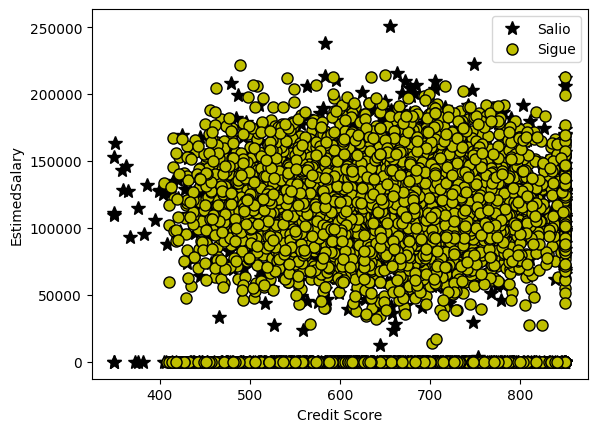

In [92]:
plotData(X, y)
# adiciona etiquetas para los ejes
pyplot.xlabel('Credit Score')
pyplot.ylabel('EstimedSalary')
pyplot.legend(['Salio', 'Sigue'])
pass

<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Función Sigmoidea

La hipotesis para la regresión logistica se define como:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea se define como:

$$g(z) = \frac{1}{1+e^{-z}}$$

Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de `x`, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

## Mis notas xd



La hipotesis para la regresión logistica:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea se define como:

$$g(z) = \frac{1}{1+e^{-z}}$$



In [93]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy

    # 7 np.array() = convierte la entrada en un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape) # ? np.zeros() = crea un arreglo numpy de ceros con la misma forma que z
    # 7 np.exp() = calcula el exponencial de cada elemento de z. shape = forma del arreglo numpy (filas, columnas)
    g = 1 / (1 + np.exp(-z))
    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [94]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z) # ? g = 0.5
#  7 Si el resultado es 0.5 entonces funciona bien
print('g(', z, ') = ', g)

g( 0 ) =  0.5


<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [95]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
# 7 Volvemos a agregar una columna de 1's porque si xd
# 7 shape = forma del arreglo numpy (filas, columnas)
m, n = X.shape
# Agraga el termino de intercepción a A

# 7 np.concatenate() = une dos arreglos numpy en un
# solo arreglo numpy. axis = eje a lo largo del cual
# se concatenan los arreglos numpy. Admitido = 0, 1.
X = np.concatenate([np.ones((m, 1)), X], axis=1)

print(X[5])
print(X)

[1.0000000e+00 6.4500000e+02 1.1375578e+05]
[[1.0000000e+00 6.1900000e+02 0.0000000e+00]
 [1.0000000e+00 6.0800000e+02 8.3807860e+04]
 [1.0000000e+00 5.0200000e+02 1.5966080e+05]
 ...
 [1.0000000e+00 7.0900000e+02 0.0000000e+00]
 [1.0000000e+00 7.7200000e+02 7.5075310e+04]
 [1.0000000e+00 7.9200000e+02 1.3014279e+05]]


La funcion de costo en una regresión logistica es:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

y el gradiente del costo es un vector de la misma longitud como $\theta$ donde el elemento $j^{th}$ (para $j = 0, 1, \cdots , n$) se define como:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Si bien este gradiente parece idéntico al gradiente de regresión lineal, la fórmula es diferente porque la regresión lineal y logística tienen diferentes definiciones de $h_\theta(x)$.
<a id="costFunction"></a>

## Mis notas xd

La funcion de costo en una regresión logistica es:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

y el gradiente del costo es un vector de la misma longitud como $\theta$ donde el elemento $j^{th}$ (para $j = 0, 1, \cdots , n$) se define como:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Si bien este gradiente parece idéntico al gradiente de regresión lineal, la fórmula es diferente porque la regresión lineal y logística tienen diferentes definiciones de $h_\theta(x)$.
<a id="costFunction"></a>

In [96]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    # 7 dot: producto punto entre dos arreglos numpy. np.log(): calcula
    # el logaritmo natural de cada elemento de h. np.sum(): suma todos los
    # elementos de un arreglo numpy.
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

In [97]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    # 7 copy(): realiza una copia de theta
    theta = theta.copy() #
    J_history = []

    for i in range(num_iters):
        # 7 dot(): producto punto entre dos arreglos
        # numpy. T: transpuesta de un arreglo numpy.
        h = sigmoid(X.dot(theta.T))
        # 7 theta: actualiza los valores de theta. alpha: tasa
        # de aprendizaje. m: numero de ejemplos de entrenamiento.
        # h: hipotesis. y: etiquetas. X: matriz de datos.
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

<ipython-input-93-4009d92288d4>:10: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
<ipython-input-96-ec76459230ea>:10: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


theta calculado por el descenso por el gradiente: [ 1.28067226e-04 -4.70907415e-03  8.78504849e-01]
1 = A abandonado el banco
0 = Sigue en el banco
Un cliente CreditScore: 619 y Salario Estimado de : 101348.88 (usando el descenso por el gradiente): 1.0


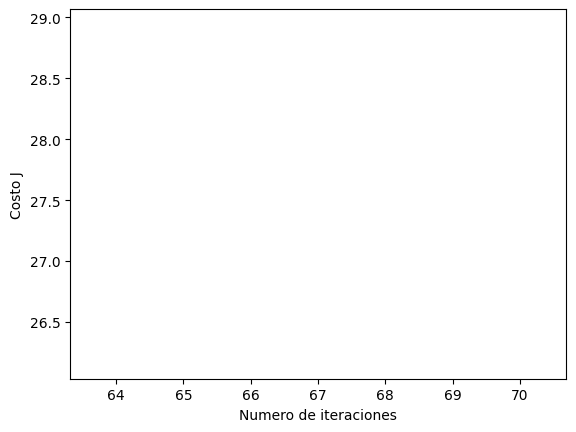

In [98]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.00008
num_iters = 1000

# inicializa theta y ejecuta el descenso por el gradiente
# OJO AQUI TIENES QUE PONER EL NUMERO DE COLUMNAS (X_array)
# EN ESTE CASO 3 np.zeros(3)
theta = np.zeros(3)
# 7 np.zeros(): crea un arreglo numpy de ceros.
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)
# 7 descensoGradiente(): funcion que calcula el descenso por el gradiente. theta: vector de parametros. X: matriz de datos. y: etiquetas. alpha: tasa de aprendizaje. num_iters: numero de iteraciones.

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
# En este caso añadimos nuestras X's [Nota_examen1,nota_examen2]
# Es decir                                20      , 40
# El 1 del principio se queda porque si xd
X_array = [1, 619, 101348.88]
aprueba = sigmoid(np.dot(X_array, theta))   # ! Se debe cambiar esto
print("1 = A abandonado el banco")
print("0 = Sigue en el banco")
print(f"Un cliente CreditScore: {X_array[1]} y Salario Estimado de : {X_array[2]} (usando el descenso por el gradiente): {aprueba}")

In [99]:
# Hacemos otra prediccion de prueba
# En este caso con ambas notas de 80
# X_array = [1, 80, 80]
# aprueba = sigmoid(np.dot(X_array, theta))
# print(f"Un estudiante con nota del examen 1: {X_array[1]} y nota del examen 2: {X_array[2]} (usando el descenso por el gradiente):{aprueba}")

In [100]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

In [101]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')



[0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[2.96300000e-01 1.93806300e+02 1.96841352e+04]
Gradiente en theta inicial (zeros):
	[0.2963, 193.8063, 19684.1352]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [102]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-24, 0.2, 0.2])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[-24.    0.2   0.2]
Costo en theta prueba: nan
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[0.796, 519.071, 57927.080]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


<ipython-input-100-1a3084f56ce3>:10: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


#### 1.2.3 Parámetros de aprendizaje usando `scipy.optimize`

En el codigo anterior se encontró los parámetros óptimos de un modelo de regresión lineal al implementar el descenso de gradiente. Se implemento una función de costo y se calculó su gradiente, utilizando el algoritmo del descenso por el gradiente.

En lugar de realizar los pasos del descenso por el gradiente, se utilizará el [módulo `scipy.optimize`] (https://docs.scipy.org/doc/scipy/reference/optimize.html). SciPy es una biblioteca de computación numérica para `python`. Proporciona un módulo de optimización para la búsqueda y minimización de raíces. A partir de `scipy 1.0`, la función` scipy.optimize.minimize` es el método a utilizar para problemas de optimización (tanto restringidos como no restringidos).

For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters $\theta$.
Concretely, you are going to use `optimize.minimize` to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values). You will pass to `optimize.minimize` the following inputs:

Para la regresión logística, se desea optimizar la función de costo $J(\theta)$ con los parámetros $\theta$.
Concretamente, se va a utilizar `optimize.minimize` para encontrar los mejores parámetros $\theta$ para la función de costo de regresión logística, dado un dataset fijo (de valores X e y). Se pasara a `optimize.minimize` las siguientes entradas:

- `costFunction`: Una función de costo que, cuando se le da el dataset de entrenamiento y un $\theta$ particular, calcula el costo de regresión logística y el gradiente con respecto a $\theta$ para el dataset(X, y). Es importante tener en cuenta que solo se pasa el nombre de la función sin el paréntesis. Esto indica que solo proporcionamos una referencia a esta función y no evaluamos el resultado de esta función.
- `initial_theta`: Los valores iniciales de los parametros que se tratan de optimizar.
- `(X, y)`: Estos son argumentos adicionales a la funcion de costo.
- `jac`: Indicación si la función de costo devuelve el jacobiano (gradiente) junto con el valor de costo. (True)
- `method`: Método / algoritmo de optimización a utilizar
- `options`: Opciones adicionales que pueden ser específicas del método de optimización específico. Solo se indica al algoritmo el número máximo de iteraciones antes de que termine.

Si se ha completado la `costFunction` correctamente,`optimize.minimize` convergerá en los parámetros de optimización correctos y devolverá los valores finales del costo y $\theta$ en un objeto de clase.

Al usar `optimize.minimize`, no se tuvo que escribir ningún bucle ni establecer una tasa de aprendizaje como se hizo para el descenso de gradientes. Todo esto se hace mediante `optimize.minimize`: solo se necesita proporcionar una función que calcule el costo y el gradiente.

A continuación, se tiene el código para llamar a `optimize.minimize` con los argumentos correctos.

In [103]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize
# para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

Costo con un valor de theta encontrado por optimize.minimize: 0.501
Costo esperado (aproximado): 0.203

theta:
	[-0.002, -0.003, 0.000]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


<ipython-input-103-7a8fccce2a65>:8: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction,


Una vez que se completa `optimize.minimize`, se usa el valor final de $\theta$ para visualizar el límite de decisión en los datos de entrenamiento.

Para hacerlo, se implementa la función `plotDecisionBoundary` para trazar el límite de decisión sobre los datos de entrenamiento.

In [104]:
def plotDecisionBoundary(plotData, theta, X, y):
    """
    Grafica los puntos X y Y en una nueva figura con un limite de desicion definido por theta.
    the data points X and y into a new figure with the decision boundary defined by theta.
    Grafica los puntos con * para los ejemplos positivos y con o para los ejemplos negativos.

    Parametros:
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : array_like
        Parametros para la regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Data set de entrada. Se supone que X es una de las siguientes:
            1) Matriz Mx3, donde la primera columna es una columna de unos para intercepción.
            2) Matriz MxN, N> 3, donde la primera columna son todos unos.

    y : array_like
        Vector de datos de etiquetas de la forma (m, ).
    """
    # hacer que theta sera un arreglo numpy
    theta = np.array(theta)

    # Graficar los datos (recordar que la primera
    # columna en X es la intercepción)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Solo se requieren 2 puntos para definir
        # una linea, para lo cual se eligen dos puntos finales
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calcular la línea límite de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        print(plot_x)
        print(plot_y)
        # Graficar y ajustar los ejes para una mejor visualización
        pyplot.plot(plot_x, plot_y)

        # Leyenda, especifica para el ejercicio
        pyplot.legend(['Admitido', 'No admitido', 'Limite de decisión'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Rango de la grilla
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evalua z = theta*x sobre la grilla
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T
        # importante transponer z antes de llamar al contorno
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)


[348. 852.]
[213119.08381869 520945.32916867]


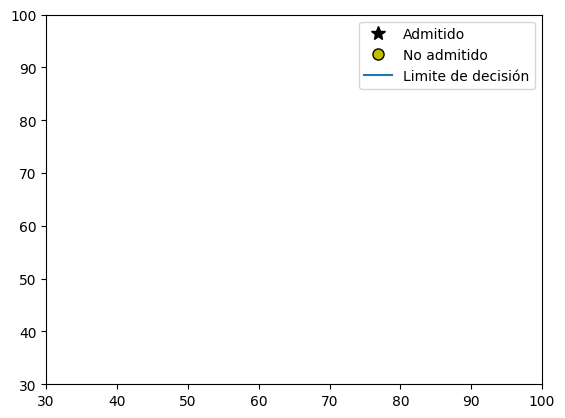

In [105]:
# Graficar limites
plotDecisionBoundary(plotData, theta, X, y)

<a id="section4"></a>
#### 1.2.4 Evaluación de la regresión logistica

Después de aprender los parámetros, se puede usar el modelo para predecir si un estudiante en particular será admitido. Para un estudiante con una puntuación en el Examen 1 de 45 y una puntuación en el Examen 2 de 85, debe esperar ver una probabilidad de admisión de 0,776. Otra forma de evaluar la calidad de los parámetros que hemos encontrado es ver qué tan bien predice el modelo aprendido en nuestro conjunto de entrenamiento.

In [106]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

Una vez entrenado el modelo se procede a realizar la prediccion y evaluación de los resultados de predecir cual es el valor que vota el modelo para todos los datos utilizados en el entrenamiento.

In [111]:
#  Predice la probabilidad de un cliente con las siguientes caracteristicas de dejar el banco
prob = sigmoid(np.dot([1, 42,0], theta))


print(f"Un cliente edad de : {X_array[1]} años, y balance de {X_array[2]}\nTiene una probabilidad de : {aprueba} dejar el banco")
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) *100 ))
print('Precisión esperada (aproximadamente): 89.00 %')

Un cliente edad de : 619 años, y balance de 101348.88
Tiene una probabilidad de : 1.0 dejar el banco
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 79.63 %
Precisión esperada (aproximadamente): 89.00 %
